In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import time

In [7]:
#importing the dataset and storing it in a dataframe
df= pd.read_csv('wine.csv')

print("Number of rows in the dataset: ", df.shape[0])
print("Number of Features in the dataset: ", df.shape[1])

Number of rows in the dataset:  1599
Number of Features in the dataset:  12


In [8]:
#checking the first 5 rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [9]:
#convert good and bad to 1 and 0
df['quality'] = df['quality'].apply(lambda x: 1 if x=='good' else 0)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [11]:
#checking null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
#checking class imbalance
df['quality'].value_counts()


quality
1    855
0    744
Name: count, dtype: int64

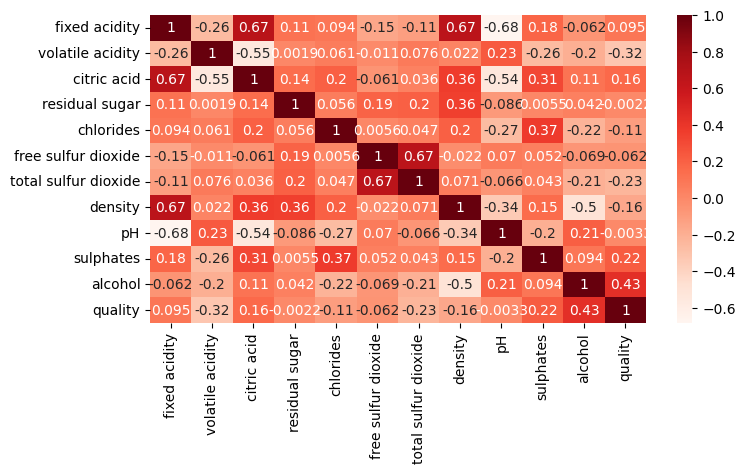

In [13]:
#corrlations plot
cor = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#split X and y
X=df.drop('quality',axis=1)
y=df['quality']


In [15]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=42)

#standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#checking the best number of components for PCA
for i in range(4,8):
    pca = PCA(n_components=i)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    print('For '+str(i)+' Components R2 is ' , pca.explained_variance_ratio_.sum())



For 4 Components R2 is  0.7034159241402639
For 5 Components R2 is  0.7935302770927687
For 6 Components R2 is  0.8536727174260111
For 7 Components R2 is  0.9069192527779366


In [16]:
#Applying PCA for 7 components

start_time_pca = time.time()
pca = PCA(n_components=7)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca_time = (time.time() - start_time_pca)


Accuracy for random forest using PCA is  0.8


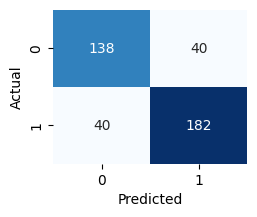

In [17]:
#Random forest model

#training the model
start_time_train_rfc = time.time()
rfc = RandomForestClassifier(n_estimators=300,max_depth=12, random_state=42, n_jobs=-1)
rfc.fit(X_train_pca, y_train)
rfc_train_time = (time.time() - start_time_train_rfc)

#testing the model
start_time_test_rfc = time.time()
y_pred = rfc.predict(X_test_pca)
rfc_test_time = (time.time() - start_time_test_rfc)
print("Accuracy for random forest using PCA is ", str(accuracy_score(y_test, y_pred)))


#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2.5,2))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Accuracy for SVM using PCA is  0.7275


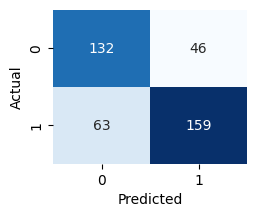

In [18]:
#SVM model with PCA

#training the model
start_time_train_svc = time.time()
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_pca, y_train)
svc_train_time = (time.time() - start_time_train_svc)

#testing the model
start_time_test_svc = time.time()
y_pred = svc.predict(X_test_pca)
svc_test_time = (time.time() - start_time_test_svc)
print("Accuracy for SVM using PCA is ", str(accuracy_score(y_test, y_pred)))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2.5,2))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Feature Selection

In [19]:
# Implementing Sequential Feature Selection on Random Forest Model

#feature selection time
start_time_sfs_rfc = time.time()
sfs = SequentialFeatureSelector(rfc, direction='forward', scoring='accuracy', n_jobs=-1)
sfs.fit(X_train_scaled,y_train)
x_selected_train = sfs.transform(X_train_scaled)
x_selected_test = sfs.transform(X_test_scaled)
sfs_rfc_time = (time.time() - start_time_sfs_rfc)
#selected features
print("Selected features are ", list(X_train.columns[(sfs.get_support())]))

Selected features are  ['citric acid', 'residual sugar', 'free sulfur dioxide', 'sulphates', 'alcohol']


Accuracy for random forest using SFS is  0.785


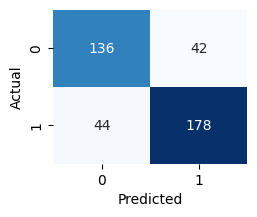

In [20]:
#random forest model with selected features

start_time_sfs_rfc_train = time.time()
rfc.fit(x_selected_train,y_train)
sfs_rfc_train_time = (time.time() - start_time_sfs_rfc_train)

start_time_sfs_rfc_test = time.time()
y_pred = rfc.predict(x_selected_test)
sfs_rfc_test_time = (time.time() - start_time_sfs_rfc_test)

acc= accuracy_score(y_test,y_pred)
print("Accuracy for random forest using SFS is ", str(acc))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2.5,2))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# Implementing Sequential Feature Selection on SVM Model

start_time_sfs_svc = time.time()
sfs1 = SequentialFeatureSelector(svc, direction='forward', scoring='accuracy', n_jobs=-1)
sfs1.fit(X_train_scaled,y_train)
x_selected_train = sfs1.transform(X_train_scaled)
x_selected_test = sfs1.transform(X_test_scaled)
sfs_svc_time = (time.time() - start_time_sfs_svc)

print("Selected features are ", list(X_train.columns[(sfs1.get_support())]))


Selected features are  ['volatile acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


Accuracy for SVM using SFS is  0.73


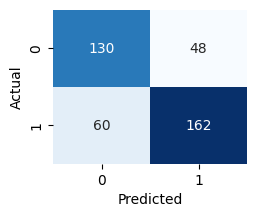

In [22]:
#SVM model with selected features

start_time_sfs_svc_train = time.time()
svc.fit(x_selected_train, y_train)
sfs_svc_train_time = (time.time() - start_time_sfs_svc_train)

start_time_sfs_svc_test = time.time()
y_pred = svc.predict(x_selected_test)
sfs_svc_test_time = (time.time() - start_time_sfs_svc_test)

acc= accuracy_score(y_test,y_pred)
print("Accuracy for SVM using SFS is ", str(acc))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2.5,2))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
#printing the time taken for each model
print("PCA time", round(pca_time,4))

print("Training time for Random Forest(with PCA) is ", round(rfc_train_time,4))
print("Testing time for Random Forest(With PCA) is ", round(rfc_test_time,4))

print("Training time for SVM(With PCA) is ", round(svc_train_time,4))
print("Testing time for SVM(With PCA) is ", round(svc_test_time,4))

print("SFS time for Random Forest is ", round(sfs_rfc_time,4))
print("Training time for Random Forest using SFS is ", round(sfs_rfc_train_time,4))
print("Testing time for Random Forest using SFS is ", round(sfs_rfc_test_time,4))

print("SFS time for SVM is ", round(sfs_svc_time,4))
print("Training time for SVM using SFS is ", round(sfs_svc_train_time,4))
print("Testing time for SVM using SFS is ", round(sfs_svc_test_time,4))



PCA time 0.0089
Training time for Random Forest(with PCA) is  0.8244
Testing time for Random Forest(With PCA) is  0.0832
Training time for SVM(With PCA) is  0.0911
Testing time for SVM(With PCA) is  0.0711
SFS time for Random Forest is  92.5018
Training time for Random Forest using SFS is  1.023
Testing time for Random Forest using SFS is  0.142
SFS time for SVM is  7.7436
Training time for SVM using SFS is  0.1014
Testing time for SVM using SFS is  0.0734
